In [397]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [398]:
Utitanic_data = pd.read_csv('train.csv')
Uq = titanic_data['Survived']>0
Uq.describe()

count       891
unique        2
top       False
freq        549
Name: Survived, dtype: object

In [399]:
549/891


0.6161616161616161

In [450]:
zzz = pd.read_csv('test.csv')
zzz = zzz[['PassengerId', 'Pclass', ]]
zzz.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [181]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [401]:
UX = Utitanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
Uy = Utitanic_data.Survived
UX = pd.get_dummies(UX)
UX = UX.fillna({'Age': UX.Age.median()})

In [451]:
zzz = zzz.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
zzz = pd.get_dummies(zzz)
zzz = zzz.fillna({'Age': zzz.Age.median(), 'Fare': 0})

In [452]:
zzz.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [404]:
UX.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [266]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [267]:
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

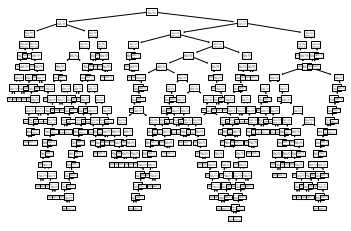

In [64]:
tree.plot_tree(clf.fit(X, y));

In [407]:
from sklearn.model_selection import train_test_split

In [418]:
UX_train, UX_test, Uy_train, Uy_test =  train_test_split(UX, Uy, random_state=42)

In [420]:
UX_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
709,3,28.0,1,1,15.2458,0,1,1,0,0
439,2,31.0,0,0,10.5000,0,1,0,0,1
840,3,20.0,0,0,7.9250,0,1,0,0,1
720,2,6.0,0,1,33.0000,1,0,0,0,1
39,3,14.0,1,0,11.2417,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
880,2,25.0,0,1,26.0000,1,0,0,0,1
425,3,28.0,0,0,7.2500,0,1,0,0,1
101,3,28.0,0,0,7.8958,0,1,0,0,1
199,2,24.0,0,0,13.0000,1,0,0,0,1


In [190]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [268]:
clf.score(X, y)

0.9797979797979798

In [287]:
clf.predict(X_ftest)

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [192]:
clf.score(X_test, y_test)

0.7694915254237288

In [193]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [194]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [195]:
clf.score(X_train, y_train)

0.8338926174496645

In [196]:
clf.score(X_test, y_test)

0.823728813559322

In [197]:
max_depth_values = range(1, 100)

In [198]:
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test1, y_test1)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [199]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


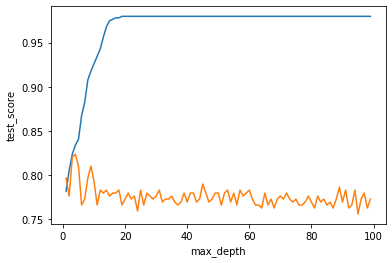

In [200]:
sns.lineplot(x='max_depth', y='train_score', data=scores_data);
sns.lineplot(x='max_depth', y='test_score', data=scores_data);

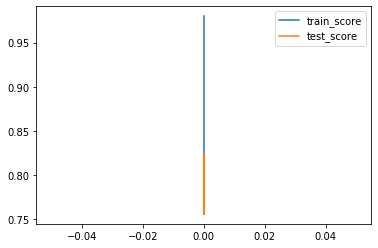

In [94]:
scores_data.train_score.plot(legend = True)
scores_data.test_score.plot(legend = True)

In [201]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score'],
                           var_name='set_type', value_name='score')
scores_data_long.tail()

,max_depth,set_type,score
193,95,test_score,0.755932
194,96,test_score,0.772881
195,97,test_score,0.779661
196,98,test_score,0.762712
197,99,test_score,0.772881


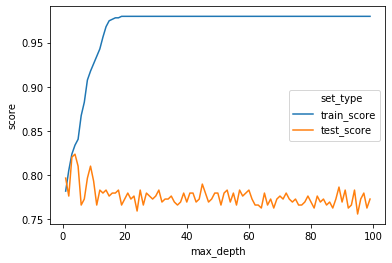

In [202]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long);

In [409]:
from sklearn.model_selection import cross_val_score

In [204]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [205]:
cross_val_score(clf, X_train, y_train , cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [206]:
cross_val_score(clf, X_train, y_train , cv=5).mean()

0.7886274509803922

In [109]:
scores_data = pd.DataFrame()

In [217]:
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [218]:
scores_data.head(20)

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.797031
0,6,0.867450,0.766102,0.800392
0,7,0.882550,0.783051,0.802059
0,8,0.907718,0.806780,0.803725
0,9,0.917785,0.796610,0.790266
0,10,0.926174,0.800000,0.798669


In [219]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
193,95,test_score,0.766102
194,96,test_score,0.766102
195,97,test_score,0.783051
196,98,test_score,0.776271


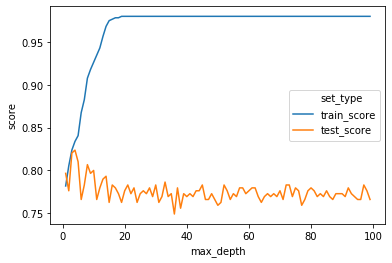

In [220]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long);

In [225]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score


In [226]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [227]:
cross_val_score(best_clf, X_test, y_test , cv=5).mean()

0.776271186440678

In [135]:
flower_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col = 0)
X_train = flower_train.drop(['species'], axis=1)
y_train = flower_train.species
y_train

130    2
7      0
11     0
142    2
109    2
      ..
147    2
124    2
123    2
146    2
68     1
Name: species, Length: 100, dtype: int64

In [136]:
flower_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col = 0)
X_test = flower_test.drop(['species'], axis=1)
y_test = flower_test.species
y_test

114    2
70     1
138    2
59     1
44     0
125    2
36     0
141    2
12     0
63     1
106    2
96     1
103    2
22     0
26     0
104    2
84     1
32     0
18     0
67     1
53     1
137    2
33     0
6      0
60     1
29     0
16     0
83     1
15     0
2      0
95     1
52     1
90     1
81     1
101    2
92     1
129    2
71     1
108    2
143    2
5      0
56     1
102    2
97     1
78     1
128    2
99     1
131    2
8      0
54     1
Name: species, dtype: int64

In [128]:
flower_train.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [131]:
my_awesome_tree = tree.DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=4)
my_awesome_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [157]:
scores_data = pd.DataFrame()
max_depth_values = range(1, 100)
# np.random.seed(0)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [145]:
scores_data

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92
...,...,...,...
0,95,1.00,0.92
0,96,1.00,0.92
0,97,1.00,0.92
0,98,1.00,0.94


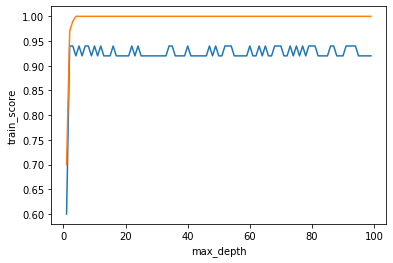

In [158]:
sns.lineplot(x='max_depth', y='test_score', data=scores_data);
sns.lineplot(x='max_depth', y='train_score', data=scores_data);

In [159]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score'],
                           var_name='set_type', value_name='score')

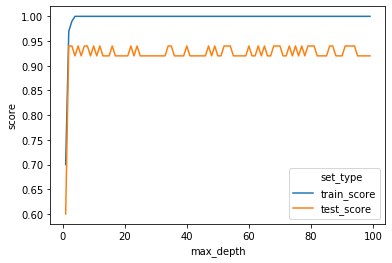

In [160]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long);

In [172]:
kotopes = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
X = kotopes.drop(['Вид'], axis=1)
y = kotopes['Вид']
# y = pd.get_dummies(y, columns=['Вид'])
y

0      собачка
1      собачка
2      собачка
3      собачка
4      собачка
        ...   
995      котик
996      котик
997      котик
998      котик
999      котик
Name: Вид, Length: 1000, dtype: object

In [165]:
scores_data = pd.DataFrame()
max_depth_values = range(1, 25)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X, y)
    train_score = clf.score(X, y)
    mean_cross_val_score = cross_val_score(clf, X, y, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'mcvl': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
scores_data

,max_depth,train_score,mcvl
0,1,1.0,1.0
0,2,1.0,1.0
0,3,1.0,1.0
0,4,1.0,1.0
0,5,1.0,1.0
0,6,1.0,1.0
0,7,1.0,1.0
0,8,1.0,1.0
0,9,1.0,1.0
0,10,1.0,1.0


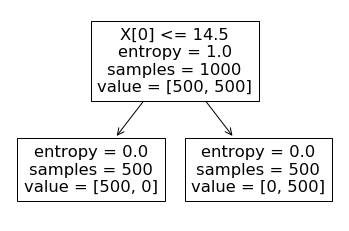

In [173]:
tree.plot_tree(clf.fit(X, y));

In [174]:
k_test = pd.read_json('dataset_209691_15.txt')
hh = clf.predict(k_test)
l = list(hh)
l.count('собачка')

43

In [175]:
true_pos = 15
false_pos = 15
true_neg = 40
false_neg = 30

prec = true_pos / (true_pos + false_pos)
rec = true_pos / (true_pos + false_neg)
f = 2 * (prec * rec) / (prec + rec)
print(prec)
print(rec)
print(f)

0.5
0.3333333333333333
0.4


In [177]:
song = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')
song

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3
...,...,...,...,...,...,...,...,...,...,...
355,just-like-that,2006,abba,Pop,Until that day\nMy life had been a river\nFoll...,972,2,0,0,1
356,ring-ring,1995,abba,Pop,I was sitting by the phone\nI was waiting all ...,1283,33,0,0,3
357,reina-danzante,1981,abba,Pop,You can dance\nYou can jive\nHaving the time o...,810,1,0,0,0
358,code-of-the-streets,2006,gangstarr,Hip-Hop,Take this for example young brothers want rep\...,1996,34,0,0,5


In [410]:
from sklearn.model_selection import GridSearchCV

In [360]:
clf = tree.DecisionTreeClassifier()

In [361]:
parametres = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,30)}

In [371]:
grid_search_cv_clf = GridSearchCV(clf, parametres, cv=5)

In [372]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [373]:
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [374]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [375]:
best_clf.score(X_test, y_test)

0.8026905829596412

In [388]:
from sklearn.metrics import precision_score, recall_score

y_pred = best_clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0])

In [377]:
precision_score(y_test, y_pred)

0.7848101265822784

In [378]:
recall_score(y_test, y_pred)

0.6966292134831461

In [396]:
predictions = best_clf.predict(X_ftest)

output = pd.DataFrame({'PassengerId': final_test_data.PassengerId, 'Survived': y_pred1})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [389]:
y_predicted_prob = best_clf.predict_proba(X_ftest)
y_predicted_prob

array([[0.88023952, 0.11976048],
       [0.41758242, 0.58241758],
       [0.88023952, 0.11976048],
       [0.88023952, 0.11976048],
       [0.41758242, 0.58241758],
       [0.88023952, 0.11976048],
       [0.41758242, 0.58241758],
       [0.88023952, 0.11976048],
       [0.41758242, 0.58241758],
       [0.88023952, 0.11976048],
       [0.88023952, 0.11976048],
       [0.66666667, 0.33333333],
       [0.02542373, 0.97457627],
       [0.88023952, 0.11976048],
       [0.02542373, 0.97457627],
       [0.02542373, 0.97457627],
       [0.88023952, 0.11976048],
       [0.88023952, 0.11976048],
       [0.41758242, 0.58241758],
       [0.41758242, 0.58241758],
       [0.66666667, 0.33333333],
       [0.88023952, 0.11976048],
       [0.02542373, 0.97457627],
       [0.66666667, 0.33333333],
       [0.02542373, 0.97457627],
       [0.88023952, 0.11976048],
       [0.02542373, 0.97457627],
       [0.88023952, 0.11976048],
       [0.66666667, 0.33333333],
       [0.88023952, 0.11976048],
       [0.

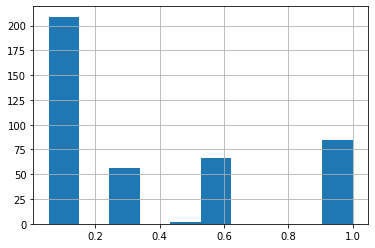

In [390]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [395]:
y_pred1 = np.where(y_predicted_prob[:, 1] > 0.63, 1, 0)

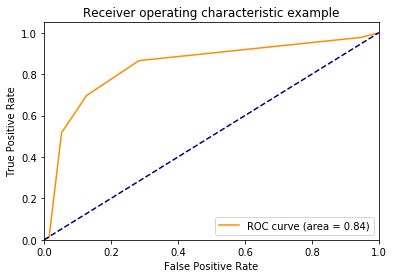

In [387]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
        label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
'''То есть елси мы выберем точку на 0.4 по у, то мы верно отметили 40 процентов выживших
но зато мы получим очень маленькое количество людей которые не выжили, а мы их квалиифицировали как выживших
На 0.9 по у мы бы отметили 90% выживших, но ошибалисб бы о тех кто не выжил, называя их выжившими аж в 50%'''

In [453]:
zzz.drop(['Fare','Sex_male','Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1, inplace=True)

In [454]:
zzz

,Pclass,Age,SibSp,Parch,Sex_female
0,3,34.5,0,0,0
1,3,47.0,1,0,1
2,2,62.0,0,0,0
3,3,27.0,0,0,0
4,3,22.0,1,1,1
...,...,...,...,...,...
413,3,27.0,0,0,0
414,1,39.0,0,0,1
415,3,38.5,0,0,0
416,3,27.0,0,0,0


In [463]:
UX

,Pclass,Age,SibSp,Parch,Sex_female
0,3,22.0,1,0,0
1,1,38.0,1,0,1
2,3,26.0,0,0,1
3,1,35.0,1,0,1
4,3,35.0,0,0,0
...,...,...,...,...,...
886,2,27.0,0,0,0
887,1,19.0,0,0,1
888,3,28.0,1,2,1
889,1,26.0,0,0,0


In [459]:
UX.drop(['Fare','Sex_male','Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1, inplace=True)
#Uy.drop(['Fare','Sex_male','Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1, inplace=True)

KeyError: "['Fare' 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S'] not found in axis"

In [424]:
UX_test

,Pclass,Age,SibSp,Parch,Sex_female
709,3,28.0,1,1,0
439,2,31.0,0,0,0
840,3,20.0,0,0,0
720,2,6.0,0,1,1
39,3,14.0,1,0,1
...,...,...,...,...,...
880,2,25.0,0,1,1
425,3,28.0,0,0,0
101,3,28.0,0,0,0
199,2,24.0,0,0,1


In [425]:
from sklearn.ensemble import RandomForestClassifier

In [428]:
rf = RandomForestClassifier()
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [432]:
parametrs = {'n_estimators' : [10,15,20,25,30,35,40,45,50,70, 90, 125, 150], 
             'max_depth' : range(1, 9),
             'min_samples_leaf':[2,4,7,10,15], 'min_samples_split':[2,4,8,16,32,20]}

In [445]:
grid_search_rf_cv = GridSearchCV(rf, parametrs, cv=5)

In [464]:
grid_search_rf_cv.fit(UX, Uy)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [465]:
best_rf = grid_search_rf_cv.best_estimator_
best_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [437]:
best_rf.score(UX_test, Uy_test)

0.8295964125560538

In [466]:
UX

,Pclass,Age,SibSp,Parch,Sex_female
0,3,22.0,1,0,0
1,1,38.0,1,0,1
2,3,26.0,0,0,1
3,1,35.0,1,0,1
4,3,35.0,0,0,0
...,...,...,...,...,...
886,2,27.0,0,0,0
887,1,19.0,0,0,1
888,3,28.0,1,2,1
889,1,26.0,0,0,0


In [457]:
zzz

,Pclass,Age,SibSp,Parch,Sex_female
0,3,34.5,0,0,0
1,3,47.0,1,0,1
2,2,62.0,0,0,0
3,3,27.0,0,0,0
4,3,22.0,1,1,1
...,...,...,...,...,...
413,3,27.0,0,0,0
414,1,39.0,0,0,1
415,3,38.5,0,0,0
416,3,27.0,0,0,0


In [467]:
y_pred = best_rf.predict(zzz)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [469]:
zzz = pd.read_csv('test.csv')
zzz

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [470]:
output = pd.DataFrame({'PassengerId': zzz.PassengerId, 'Survived': y_pred})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [438]:
UX_final_test

,Pclass,Age,SibSp,Parch,Sex_female
0,3,34.5,0,0,0
1,3,47.0,1,0,1
2,2,62.0,0,0,0
3,3,27.0,0,0,0
4,3,22.0,1,1,1
...,...,...,...,...,...
413,3,27.0,0,0,0
414,1,39.0,0,0,1
415,3,38.5,0,0,0
416,3,27.0,0,0,0
